# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Extracting mnist: 100%|██████████| 60.0K/60.0K [00:08<00:00, 6.98KFile/s] 


Extracting celeba...


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

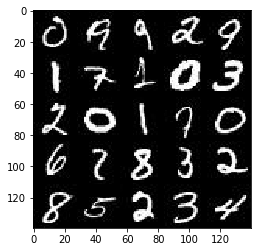

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

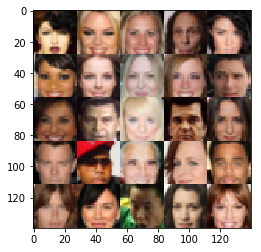

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real') 
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    
    
    
    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
alpha = 0.1
dropout = 0.5

In [7]:
def leaky_relu(l):
    return tf.maximum(alpha * l, l)

In [8]:
def discriminator(images, reuse=False):
    with tf.variable_scope('discriminator', reuse=reuse):
        # TODO: Implement Function
        l1 = tf.layers.conv2d(images, 16, 7,strides=2, padding='same')
        l1 = tf.layers.batch_normalization(l1, training=True)
        relu1 = leaky_relu(l1)

        l2 = tf.layers.conv2d(l1, 32,5,strides=2, padding='same')
        l2 = tf.layers.batch_normalization(l2, training=True)
        relu2 = leaky_relu(l2)

        l3 = tf.layers.conv2d(l2, 64,3,strides=2, padding='same')
        l3 = tf.layers.batch_normalization(l3, training=True)
        relu3 = leaky_relu(l3)
        
        l4 = tf.layers.conv2d(l3, 128,1,strides=1, padding='same')
        l4 = tf.layers.batch_normalization(l4, training=True)
        relu4 = leaky_relu(l4)
        l4 = tf.nn.dropout(l4, 0.2)

        # Flatten it
        flat = tf.contrib.layers.flatten(relu3)
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

    return out, logits

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [9]:
def generator(z, out_channel_dim, is_train=True):

    # TODO: Implement Function
    with tf.variable_scope("generator",reuse = not is_train):
        l1 = tf.layers.dense(z, 7*7*32)
        l1 = tf.layers.batch_normalization(l1, training=is_train)
        l1 = leaky_relu(l1)
        l1 = tf.layers.dropout(l1, dropout, training=is_train)
        l1 = tf.reshape(l1, (-1, 7, 7, 32))
     
        l2 = tf.layers.conv2d_transpose(l1, 16, 3, strides=2, padding='same')
        l2 = tf.layers.batch_normalization(l2, training=is_train)
        l2 = leaky_relu(l2)
        l2 = tf.layers.dropout(l2, dropout, training=is_train)
        
        l2 = tf.layers.conv2d_transpose(l2, 32, 5, strides=2, padding='same')
        l2 = tf.layers.batch_normalization(l2, training=is_train)
        l2 = leaky_relu(l2)
        l2 = tf.layers.dropout(l2, dropout, training=is_train)
        
        l2 = tf.layers.conv2d(l2, 64, 7, strides=1, padding='same')
        l2 = tf.layers.batch_normalization(l2, training=is_train)
        l2 = leaky_relu(l2)
        l2 = tf.layers.dropout(l2, dropout, training=is_train)
        
        #28*28
        l3 = tf.layers.conv2d(l2, 128, 4, strides=1, padding='same')
        l3 = tf.layers.batch_normalization(l3, training=is_train)
        l3 = leaky_relu(l3)
        l3 = tf.layers.dropout(l3, dropout, training=is_train)
        
        l4 = tf.layers.conv2d(l3, 256, 2, strides=1, padding='same')
        l4 = tf.layers.batch_normalization(l4, training=is_train)
        l4 = leaky_relu(l4)
        l4 = tf.layers.dropout(l4, dropout, training=is_train)
        
        l4 = tf.layers.conv2d(l4, 512, 1, strides=1, padding='same')
        l4 = leaky_relu(l4)
        l4 = tf.layers.dropout(l4, dropout, training=is_train)
        
        # Output layer
        logits = tf.layers.conv2d(l4, out_channel_dim, 1, strides=1, padding='same')
        # 28*28
        out = tf.tanh(logits)
    return out
      
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [10]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim, True)
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)*0.9))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)*0.9))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)*0.9))

    d_loss = d_loss_real + d_loss_fake
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [11]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
        
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        # Optimize
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [12]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [13]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    print_every = 100
    
    # TODO: Build Model
    # The inputs
    image_mode = len(data_image_mode)# image channels. works because rgb is 3 characters long and l is one, the respective amount of image channels.
    input_images, input_z, l_rate = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)

    d_loss, g_loss = model_loss(input_images, input_z, data_shape[3])
    d_train, g_train = model_opt(d_loss, g_loss, l_rate, beta1)    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            steps = 0
            for batch_images in get_batches(batch_size):
                batch_images = batch_images * 2
                # TODO: Train Model
                steps += 1

                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                _ = sess.run(d_train, feed_dict={input_images: batch_images, input_z: batch_z, l_rate: learning_rate})
                _ = sess.run(g_train, feed_dict={input_images: batch_images, input_z: batch_z, l_rate: learning_rate})
                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = sess.run(d_loss, {input_z: batch_z, input_images: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z, input_images: batch_images})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    _ = show_generator_output(sess, 16, input_z, data_shape[3], data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.6045... Generator Loss: 2.0668


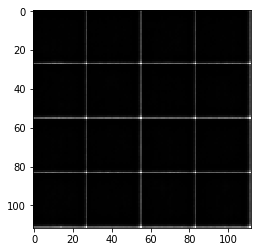

Epoch 1/2... Discriminator Loss: 0.7954... Generator Loss: 1.4761


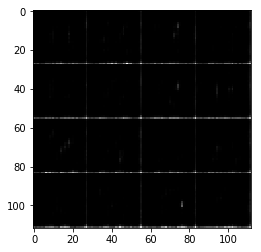

Epoch 1/2... Discriminator Loss: 0.5955... Generator Loss: 2.1164


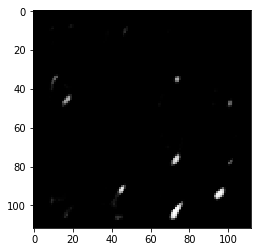

Epoch 1/2... Discriminator Loss: 0.8285... Generator Loss: 1.4361


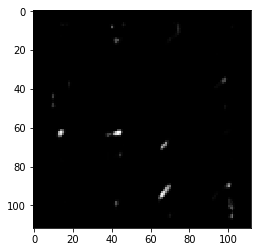

Epoch 1/2... Discriminator Loss: 0.7261... Generator Loss: 1.5443


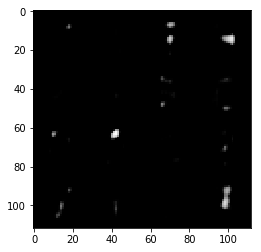

Epoch 1/2... Discriminator Loss: 0.9802... Generator Loss: 1.0528


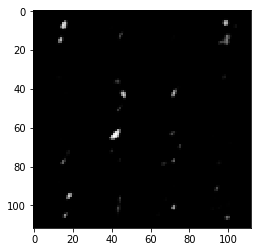

Epoch 1/2... Discriminator Loss: 0.8126... Generator Loss: 1.1050


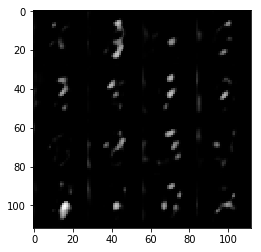

Epoch 1/2... Discriminator Loss: 0.7662... Generator Loss: 1.3151


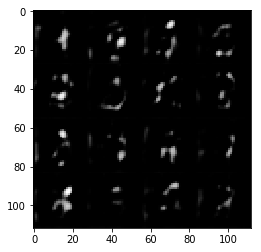

Epoch 1/2... Discriminator Loss: 0.7223... Generator Loss: 1.8209


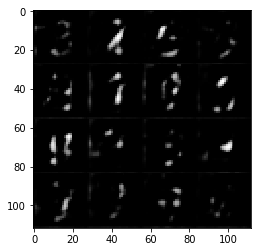

Epoch 1/2... Discriminator Loss: 0.7670... Generator Loss: 1.6161


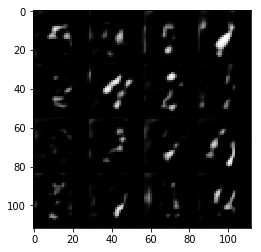

Epoch 1/2... Discriminator Loss: 0.8125... Generator Loss: 2.0768


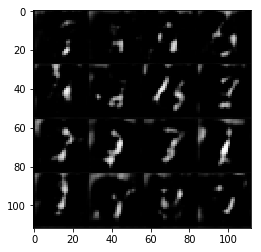

Epoch 1/2... Discriminator Loss: 1.0316... Generator Loss: 1.2781


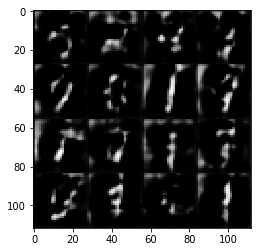

Epoch 1/2... Discriminator Loss: 0.6675... Generator Loss: 1.8744


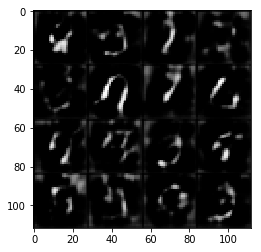

Epoch 1/2... Discriminator Loss: 0.7228... Generator Loss: 1.4642


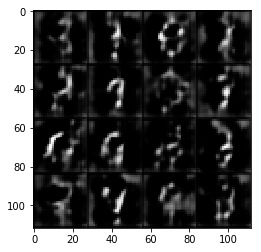

Epoch 1/2... Discriminator Loss: 0.5864... Generator Loss: 1.6806


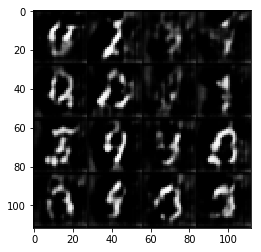

Epoch 1/2... Discriminator Loss: 0.8790... Generator Loss: 1.3635


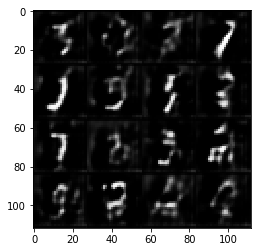

Epoch 1/2... Discriminator Loss: 0.8692... Generator Loss: 1.6555


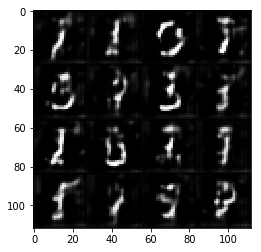

Epoch 1/2... Discriminator Loss: 0.7438... Generator Loss: 1.3875


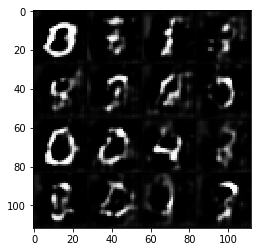

Epoch 1/2... Discriminator Loss: 0.9656... Generator Loss: 1.2819


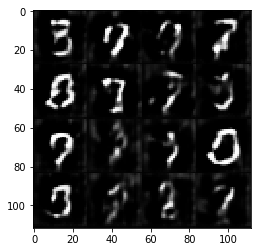

Epoch 1/2... Discriminator Loss: 0.8560... Generator Loss: 1.5574


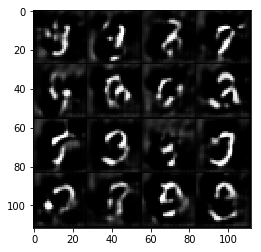

Epoch 1/2... Discriminator Loss: 0.7885... Generator Loss: 1.8764


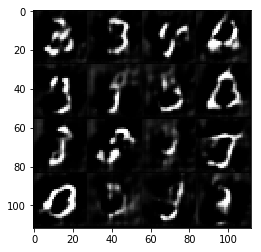

Epoch 1/2... Discriminator Loss: 0.8714... Generator Loss: 1.2818


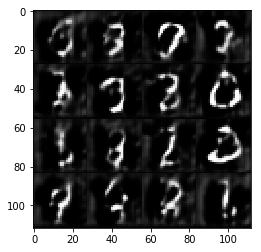

Epoch 1/2... Discriminator Loss: 0.8756... Generator Loss: 1.3726


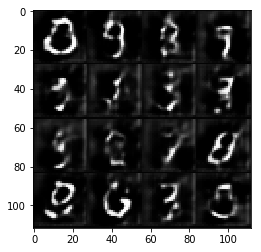

Epoch 1/2... Discriminator Loss: 0.7804... Generator Loss: 1.3300


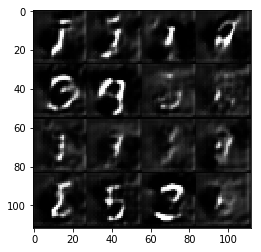

Epoch 1/2... Discriminator Loss: 0.9450... Generator Loss: 1.1206


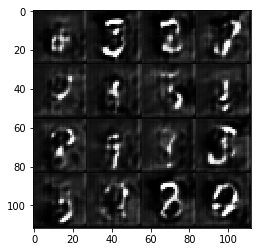

Epoch 1/2... Discriminator Loss: 0.7849... Generator Loss: 0.9908


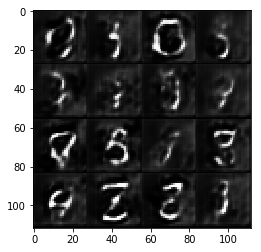

Epoch 1/2... Discriminator Loss: 0.9359... Generator Loss: 0.9390


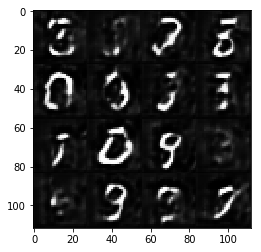

Epoch 1/2... Discriminator Loss: 0.9411... Generator Loss: 1.1273


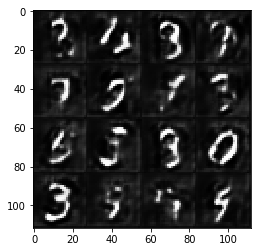

Epoch 1/2... Discriminator Loss: 0.9015... Generator Loss: 1.6580


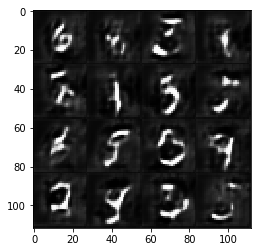

Epoch 1/2... Discriminator Loss: 0.8916... Generator Loss: 1.4470


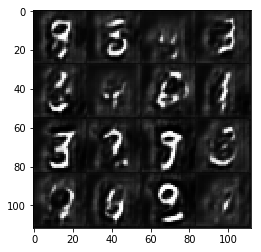

Epoch 1/2... Discriminator Loss: 0.9452... Generator Loss: 1.3783


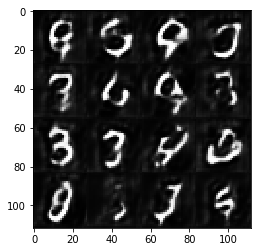

Epoch 1/2... Discriminator Loss: 0.7282... Generator Loss: 1.1003


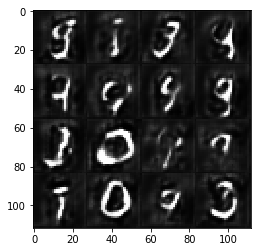

Epoch 1/2... Discriminator Loss: 0.9665... Generator Loss: 1.2523


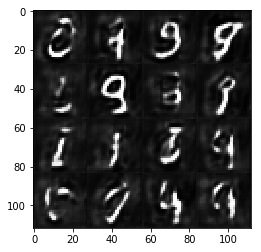

Epoch 1/2... Discriminator Loss: 1.2517... Generator Loss: 1.3687


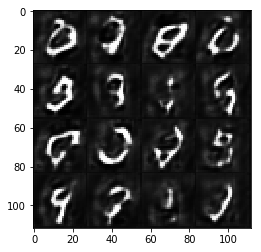

Epoch 1/2... Discriminator Loss: 0.9430... Generator Loss: 1.2659


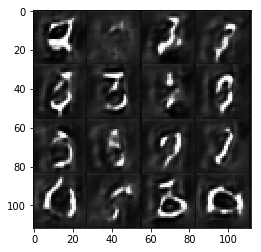

Epoch 1/2... Discriminator Loss: 0.9591... Generator Loss: 1.2876


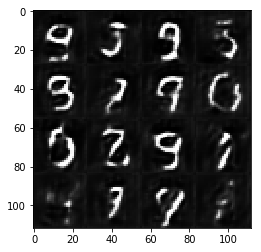

Epoch 1/2... Discriminator Loss: 1.0474... Generator Loss: 1.2775


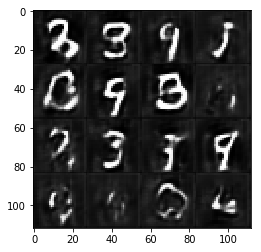

Epoch 2/2... Discriminator Loss: 0.8191... Generator Loss: 1.0851


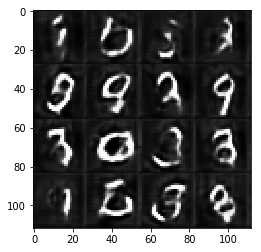

Epoch 2/2... Discriminator Loss: 0.9410... Generator Loss: 1.0349


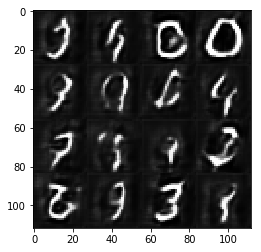

Epoch 2/2... Discriminator Loss: 1.1509... Generator Loss: 1.3947


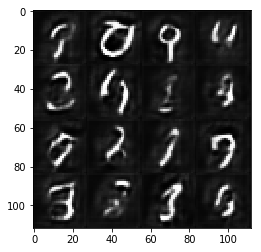

Epoch 2/2... Discriminator Loss: 0.9292... Generator Loss: 1.3644


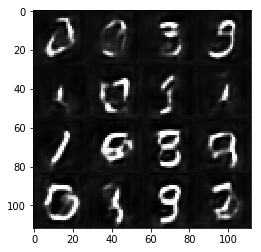

Epoch 2/2... Discriminator Loss: 0.9017... Generator Loss: 1.1656


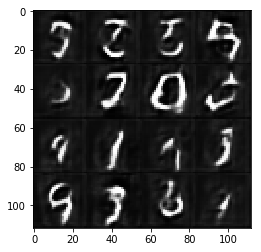

Epoch 2/2... Discriminator Loss: 1.1082... Generator Loss: 1.1338


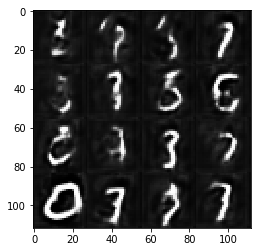

Epoch 2/2... Discriminator Loss: 0.8359... Generator Loss: 1.2002


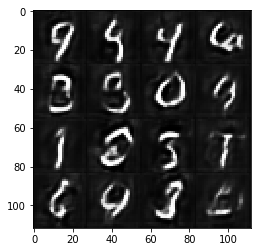

Epoch 2/2... Discriminator Loss: 0.9733... Generator Loss: 0.9557


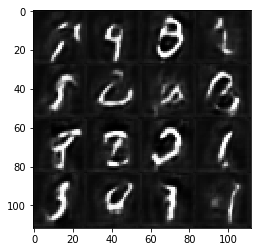

Epoch 2/2... Discriminator Loss: 1.1153... Generator Loss: 1.1675


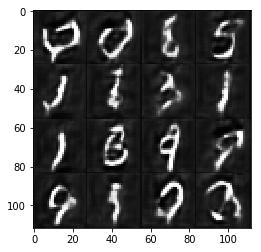

Epoch 2/2... Discriminator Loss: 0.9537... Generator Loss: 1.4616


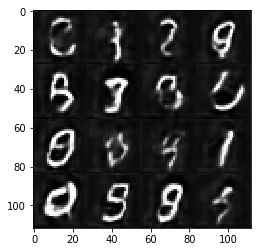

Epoch 2/2... Discriminator Loss: 0.9700... Generator Loss: 1.2366


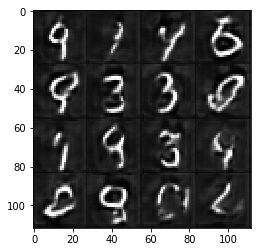

Epoch 2/2... Discriminator Loss: 0.9110... Generator Loss: 1.3715


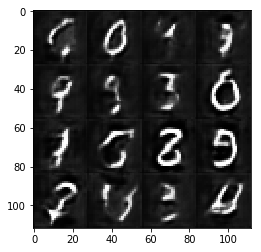

Epoch 2/2... Discriminator Loss: 0.8968... Generator Loss: 1.4915


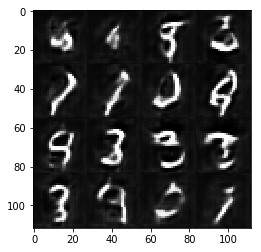

Epoch 2/2... Discriminator Loss: 0.7105... Generator Loss: 1.3871


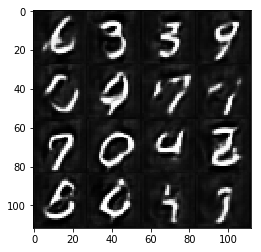

Epoch 2/2... Discriminator Loss: 0.8951... Generator Loss: 1.1367


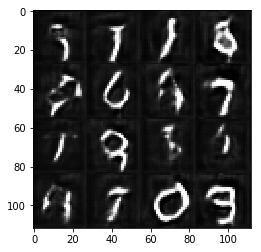

Epoch 2/2... Discriminator Loss: 0.7882... Generator Loss: 1.5763


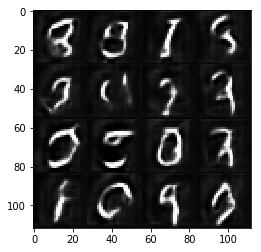

Epoch 2/2... Discriminator Loss: 1.0035... Generator Loss: 1.1166


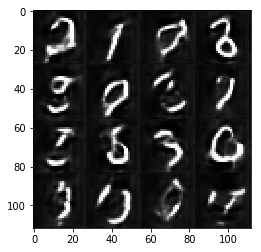

Epoch 2/2... Discriminator Loss: 1.0920... Generator Loss: 1.4076


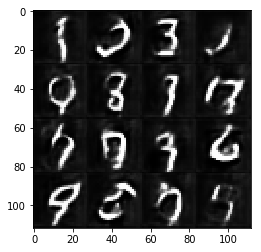

Epoch 2/2... Discriminator Loss: 0.9997... Generator Loss: 1.7041


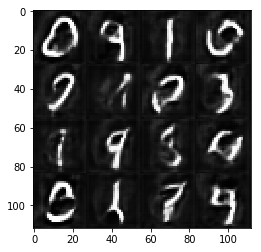

Epoch 2/2... Discriminator Loss: 1.0991... Generator Loss: 1.1008


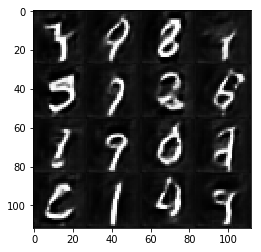

Epoch 2/2... Discriminator Loss: 0.9182... Generator Loss: 0.9135


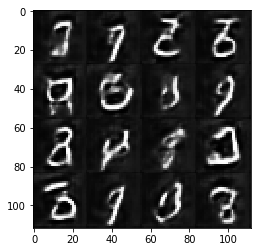

Epoch 2/2... Discriminator Loss: 1.0354... Generator Loss: 1.3361


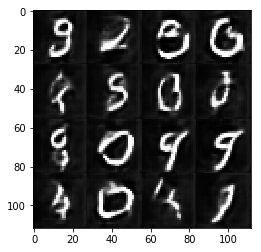

Epoch 2/2... Discriminator Loss: 0.9241... Generator Loss: 0.9957


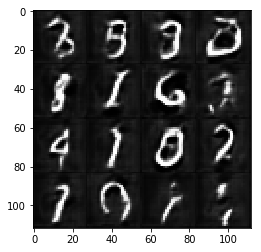

Epoch 2/2... Discriminator Loss: 0.9340... Generator Loss: 1.2330


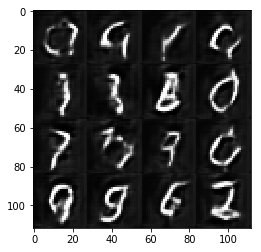

Epoch 2/2... Discriminator Loss: 1.1404... Generator Loss: 1.0821


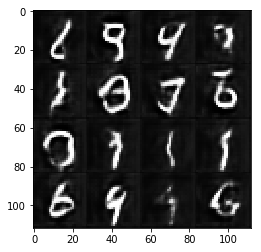

Epoch 2/2... Discriminator Loss: 0.8287... Generator Loss: 1.2009


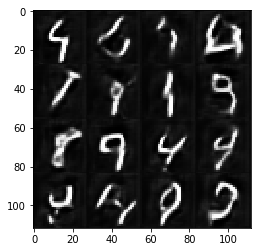

Epoch 2/2... Discriminator Loss: 1.0833... Generator Loss: 0.8797


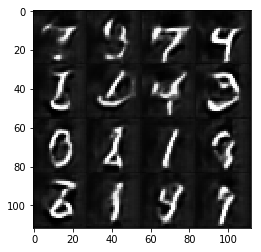

Epoch 2/2... Discriminator Loss: 0.8711... Generator Loss: 1.0913


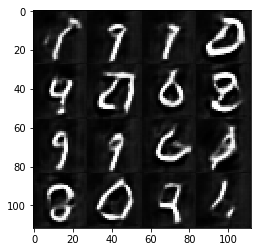

Epoch 2/2... Discriminator Loss: 1.0238... Generator Loss: 0.9810


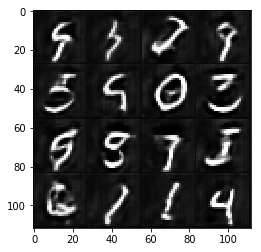

Epoch 2/2... Discriminator Loss: 1.0930... Generator Loss: 1.0706


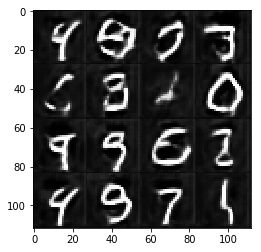

Epoch 2/2... Discriminator Loss: 0.9367... Generator Loss: 1.3390


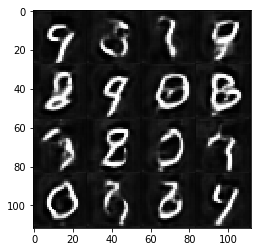

Epoch 2/2... Discriminator Loss: 0.8662... Generator Loss: 1.2612


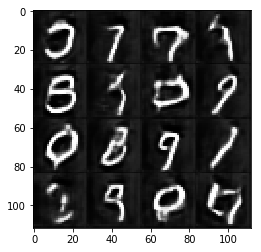

Epoch 2/2... Discriminator Loss: 0.9170... Generator Loss: 1.1780


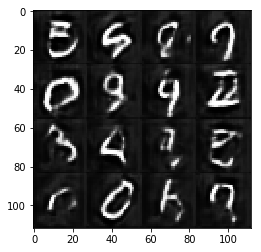

Epoch 2/2... Discriminator Loss: 1.2815... Generator Loss: 1.0513


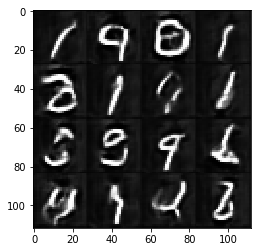

Epoch 2/2... Discriminator Loss: 1.1445... Generator Loss: 1.1222


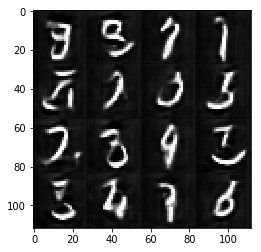

Epoch 2/2... Discriminator Loss: 0.9592... Generator Loss: 1.1597


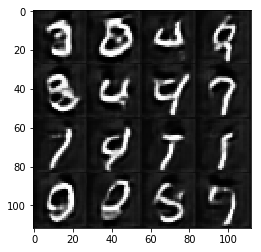

Epoch 2/2... Discriminator Loss: 0.9114... Generator Loss: 1.5410


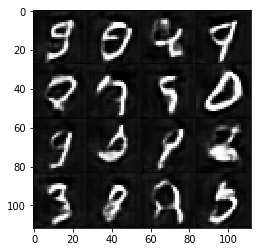

In [14]:
batch_size = 16
z_dim = 100
learning_rate = 0.00025
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.4150... Generator Loss: 2.4994


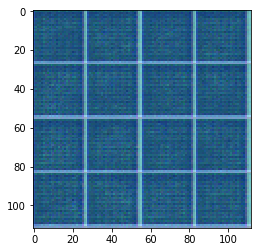

Epoch 1/1... Discriminator Loss: 0.3992... Generator Loss: 3.3299


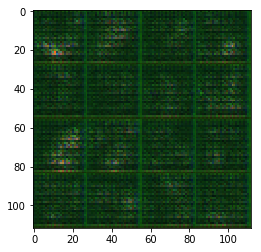

Epoch 1/1... Discriminator Loss: 0.3735... Generator Loss: 4.0044


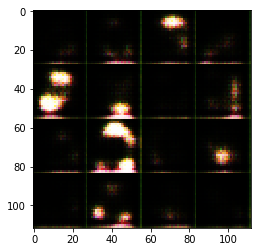

Epoch 1/1... Discriminator Loss: 0.3687... Generator Loss: 3.6995


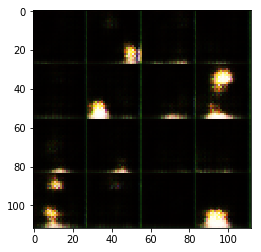

Epoch 1/1... Discriminator Loss: 0.3716... Generator Loss: 4.0660


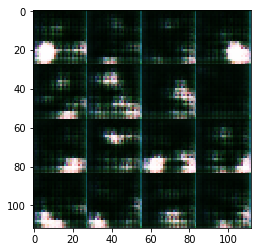

Epoch 1/1... Discriminator Loss: 0.3873... Generator Loss: 3.4670


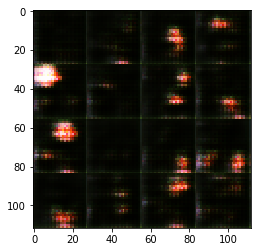

Epoch 1/1... Discriminator Loss: 0.4109... Generator Loss: 3.2982


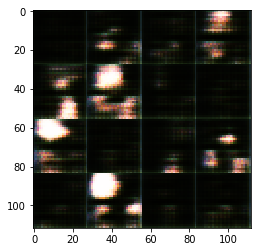

Epoch 1/1... Discriminator Loss: 0.3780... Generator Loss: 3.5939


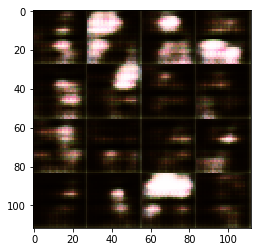

Epoch 1/1... Discriminator Loss: 0.4019... Generator Loss: 3.7142


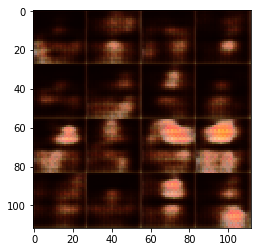

Epoch 1/1... Discriminator Loss: 0.3954... Generator Loss: 2.9193


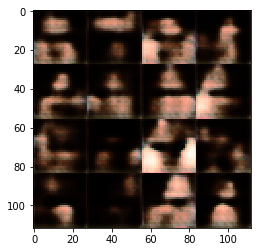

Epoch 1/1... Discriminator Loss: 0.4011... Generator Loss: 3.0064


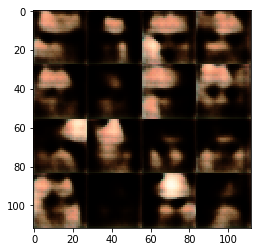

Epoch 1/1... Discriminator Loss: 0.3866... Generator Loss: 3.1769


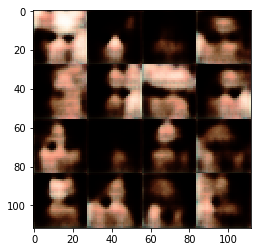

Epoch 1/1... Discriminator Loss: 0.4136... Generator Loss: 4.1096


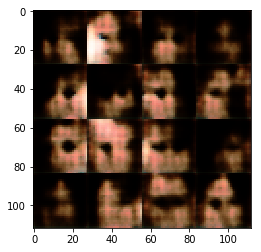

Epoch 1/1... Discriminator Loss: 0.3833... Generator Loss: 2.5406


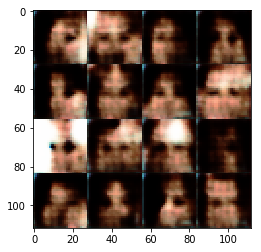

Epoch 1/1... Discriminator Loss: 0.3974... Generator Loss: 3.0201


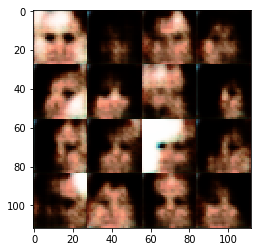

Epoch 1/1... Discriminator Loss: 0.3911... Generator Loss: 3.7495


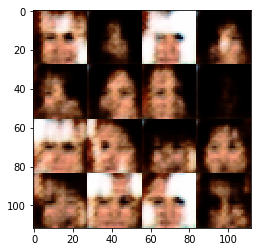

Epoch 1/1... Discriminator Loss: 0.4475... Generator Loss: 2.8036


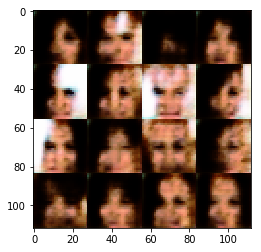

Epoch 1/1... Discriminator Loss: 0.4278... Generator Loss: 2.8203


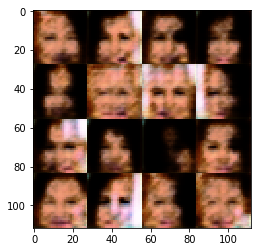

Epoch 1/1... Discriminator Loss: 0.4110... Generator Loss: 2.3549


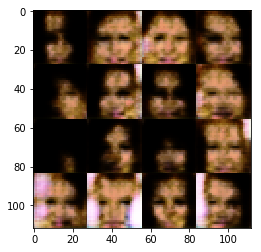

Epoch 1/1... Discriminator Loss: 0.3942... Generator Loss: 3.0258


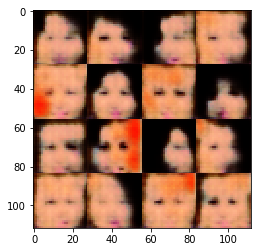

Epoch 1/1... Discriminator Loss: 0.4994... Generator Loss: 2.4566


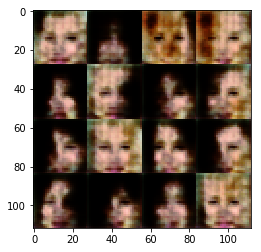

Epoch 1/1... Discriminator Loss: 0.4237... Generator Loss: 3.0918


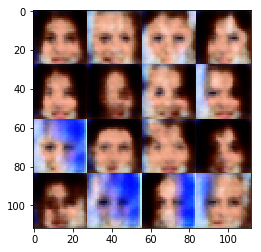

Epoch 1/1... Discriminator Loss: 0.4389... Generator Loss: 2.8167


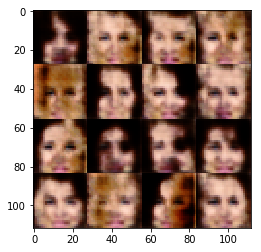

Epoch 1/1... Discriminator Loss: 0.4061... Generator Loss: 2.1836


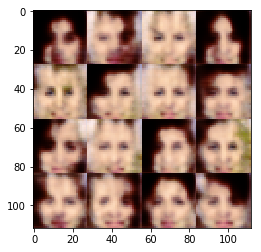

Epoch 1/1... Discriminator Loss: 0.4835... Generator Loss: 2.5249


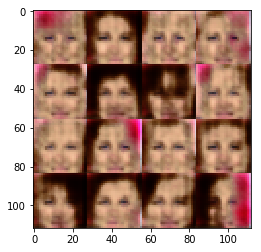

Epoch 1/1... Discriminator Loss: 0.4484... Generator Loss: 2.3975


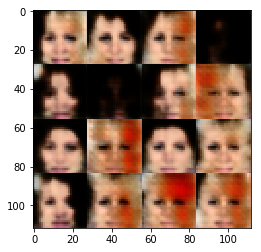

Epoch 1/1... Discriminator Loss: 0.4011... Generator Loss: 2.9457


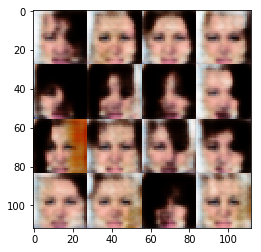

Epoch 1/1... Discriminator Loss: 0.4612... Generator Loss: 2.8462


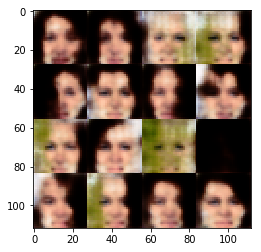

Epoch 1/1... Discriminator Loss: 0.6716... Generator Loss: 2.6143


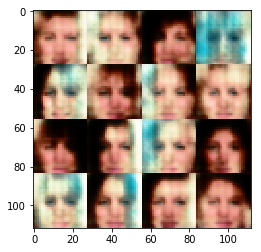

Epoch 1/1... Discriminator Loss: 0.3912... Generator Loss: 3.5968


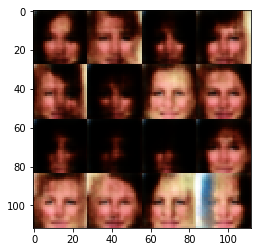

Epoch 1/1... Discriminator Loss: 0.4679... Generator Loss: 2.3340


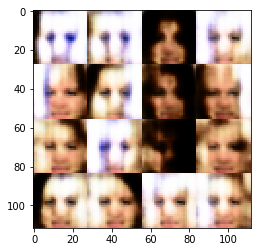

Epoch 1/1... Discriminator Loss: 0.4315... Generator Loss: 2.6434


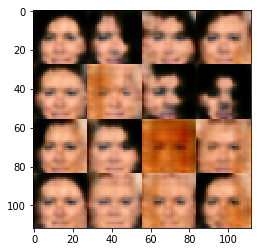

Epoch 1/1... Discriminator Loss: 0.4734... Generator Loss: 2.4967


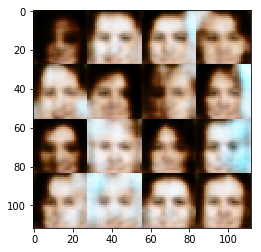

Epoch 1/1... Discriminator Loss: 0.4145... Generator Loss: 2.6934


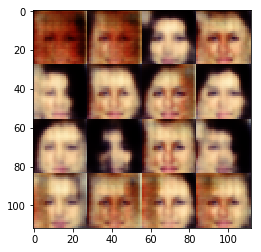

Epoch 1/1... Discriminator Loss: 0.4293... Generator Loss: 2.7693


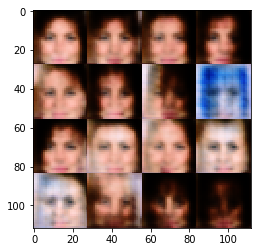

Epoch 1/1... Discriminator Loss: 0.3867... Generator Loss: 3.6028


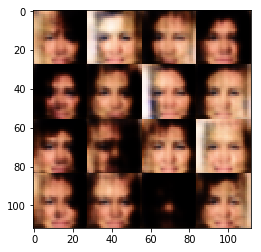

Epoch 1/1... Discriminator Loss: 0.3847... Generator Loss: 3.3817


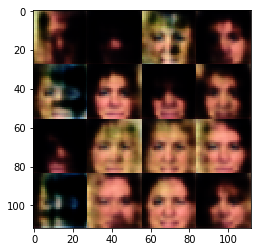

Epoch 1/1... Discriminator Loss: 0.6521... Generator Loss: 1.8668


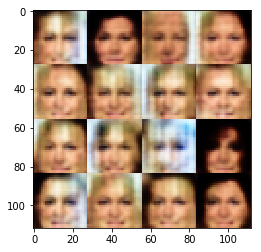

Epoch 1/1... Discriminator Loss: 0.5289... Generator Loss: 2.5935


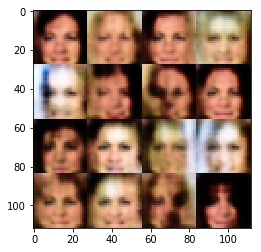

Epoch 1/1... Discriminator Loss: 0.3846... Generator Loss: 3.6053


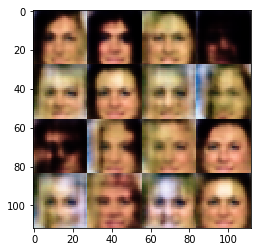

Epoch 1/1... Discriminator Loss: 0.4634... Generator Loss: 2.4083


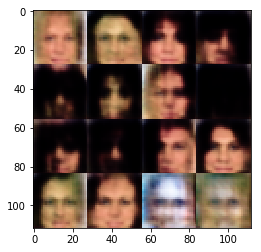

Epoch 1/1... Discriminator Loss: 0.4977... Generator Loss: 2.4174


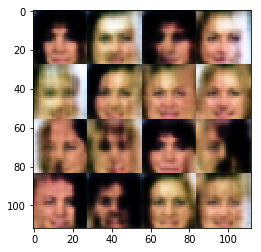

Epoch 1/1... Discriminator Loss: 0.4507... Generator Loss: 2.5498


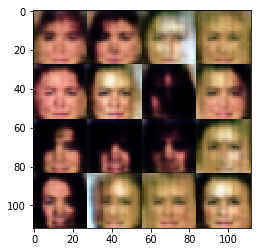

Epoch 1/1... Discriminator Loss: 0.3904... Generator Loss: 3.2573


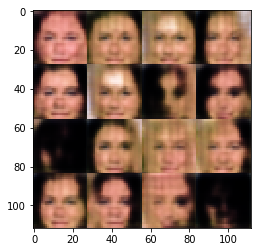

Epoch 1/1... Discriminator Loss: 0.4440... Generator Loss: 2.6267


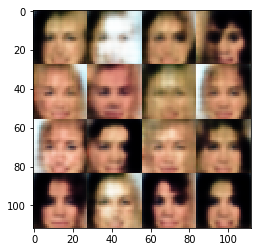

Epoch 1/1... Discriminator Loss: 0.4352... Generator Loss: 2.5614


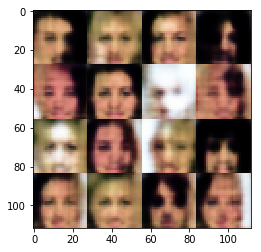

Epoch 1/1... Discriminator Loss: 0.4934... Generator Loss: 1.5391


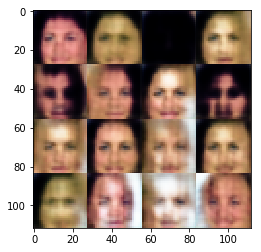

Epoch 1/1... Discriminator Loss: 0.4839... Generator Loss: 2.2668


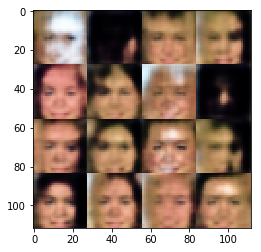

Epoch 1/1... Discriminator Loss: 0.4067... Generator Loss: 2.6452


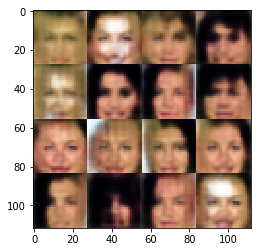

Epoch 1/1... Discriminator Loss: 0.4232... Generator Loss: 3.3820


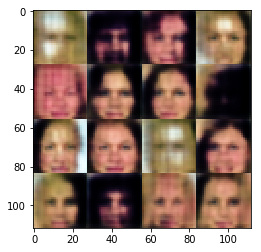

Epoch 1/1... Discriminator Loss: 0.4445... Generator Loss: 2.7387


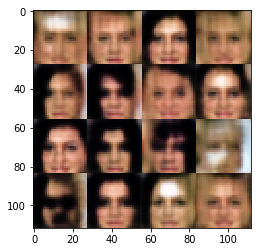

Epoch 1/1... Discriminator Loss: 0.3801... Generator Loss: 3.1592


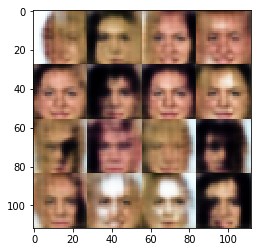

Epoch 1/1... Discriminator Loss: 0.6522... Generator Loss: 3.2800


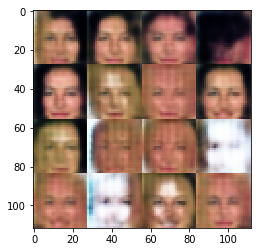

Epoch 1/1... Discriminator Loss: 0.4118... Generator Loss: 3.0442


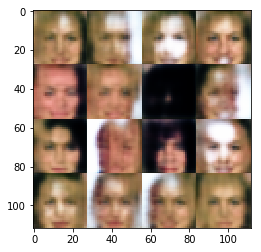

Epoch 1/1... Discriminator Loss: 0.4912... Generator Loss: 2.4749


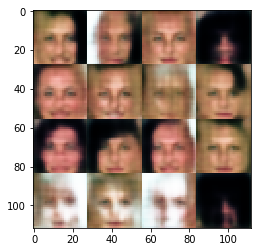

Epoch 1/1... Discriminator Loss: 0.4371... Generator Loss: 2.3868


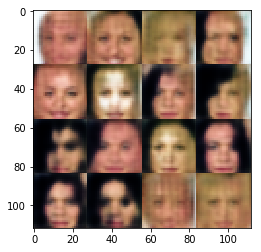

Epoch 1/1... Discriminator Loss: 0.5201... Generator Loss: 3.1201


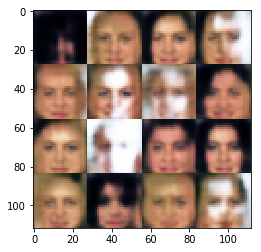

Epoch 1/1... Discriminator Loss: 0.4101... Generator Loss: 3.2627


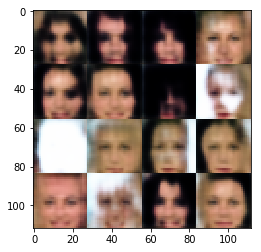

Epoch 1/1... Discriminator Loss: 0.3825... Generator Loss: 3.9124


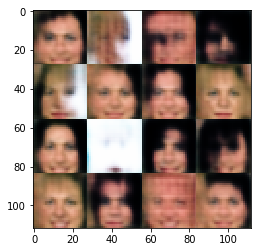

Epoch 1/1... Discriminator Loss: 0.4441... Generator Loss: 2.6017


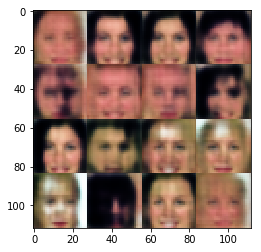

Epoch 1/1... Discriminator Loss: 0.4235... Generator Loss: 3.5778


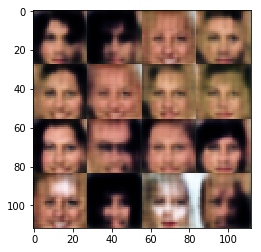

Epoch 1/1... Discriminator Loss: 0.4657... Generator Loss: 2.7367


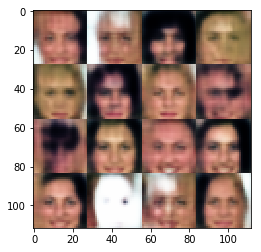

Epoch 1/1... Discriminator Loss: 0.3915... Generator Loss: 3.7436


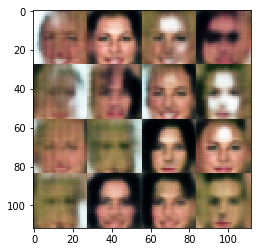

Epoch 1/1... Discriminator Loss: 0.4226... Generator Loss: 2.7437


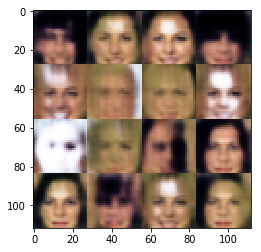

Epoch 1/1... Discriminator Loss: 0.4568... Generator Loss: 2.0461


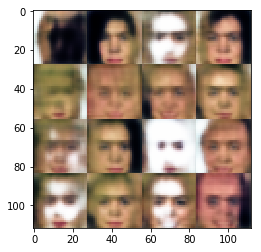

Epoch 1/1... Discriminator Loss: 0.4518... Generator Loss: 2.3273


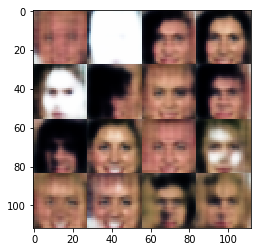

Epoch 1/1... Discriminator Loss: 0.4096... Generator Loss: 3.5290


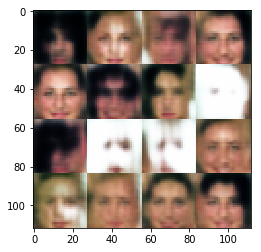

Epoch 1/1... Discriminator Loss: 0.4010... Generator Loss: 3.7885


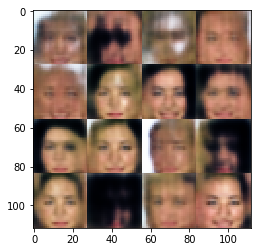

Epoch 1/1... Discriminator Loss: 0.4878... Generator Loss: 2.9998


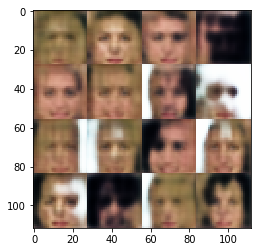

Epoch 1/1... Discriminator Loss: 0.3680... Generator Loss: 3.2291


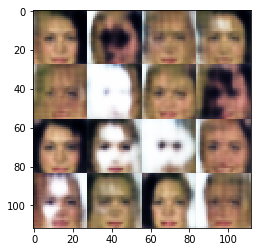

Epoch 1/1... Discriminator Loss: 0.3734... Generator Loss: 4.0705


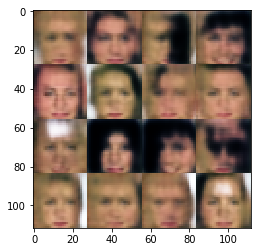

Epoch 1/1... Discriminator Loss: 0.5297... Generator Loss: 2.2437


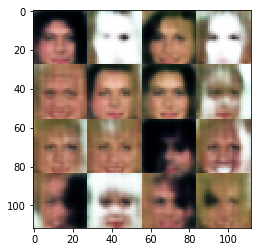

Epoch 1/1... Discriminator Loss: 0.4517... Generator Loss: 3.0631


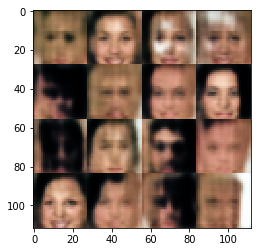

Epoch 1/1... Discriminator Loss: 0.5822... Generator Loss: 2.6695


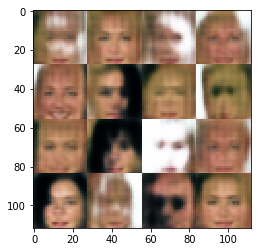

Epoch 1/1... Discriminator Loss: 0.3654... Generator Loss: 3.8434


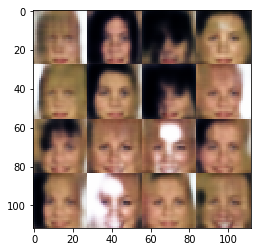

Epoch 1/1... Discriminator Loss: 0.4053... Generator Loss: 3.1503


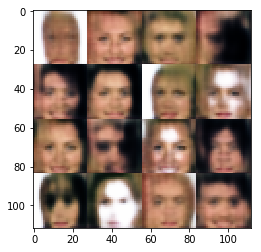

Epoch 1/1... Discriminator Loss: 0.3915... Generator Loss: 3.0615


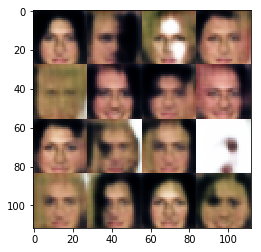

Epoch 1/1... Discriminator Loss: 0.4565... Generator Loss: 2.2541


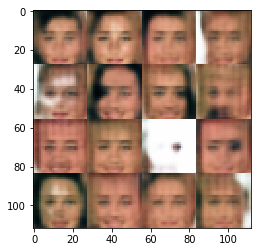

Epoch 1/1... Discriminator Loss: 0.3675... Generator Loss: 3.8558


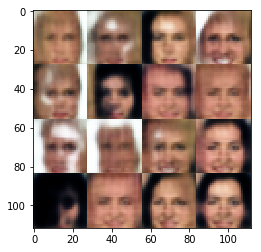

Epoch 1/1... Discriminator Loss: 0.4173... Generator Loss: 3.2093


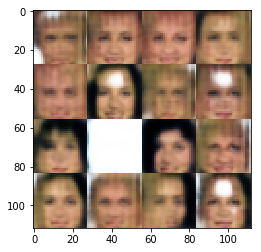

Epoch 1/1... Discriminator Loss: 0.4246... Generator Loss: 3.5712


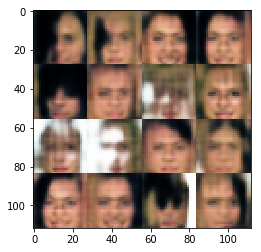

Epoch 1/1... Discriminator Loss: 0.3949... Generator Loss: 3.7166


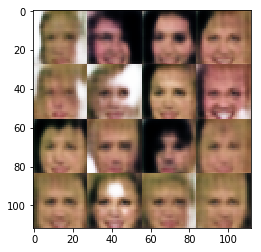

Epoch 1/1... Discriminator Loss: 0.4632... Generator Loss: 2.2241


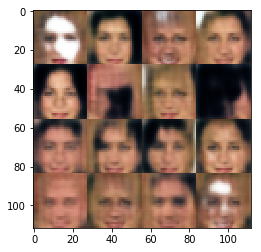

Epoch 1/1... Discriminator Loss: 0.3866... Generator Loss: 3.2164


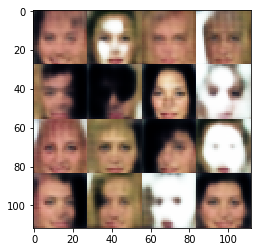

Epoch 1/1... Discriminator Loss: 0.3674... Generator Loss: 3.1635


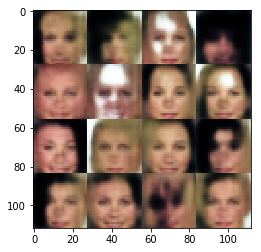

Epoch 1/1... Discriminator Loss: 0.4079... Generator Loss: 2.4319


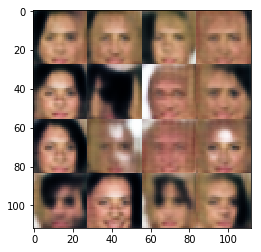

Epoch 1/1... Discriminator Loss: 0.3804... Generator Loss: 2.5979


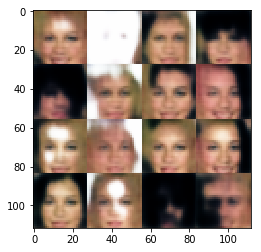

Epoch 1/1... Discriminator Loss: 0.6261... Generator Loss: 1.5783


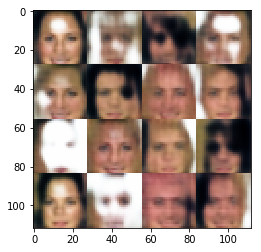

Epoch 1/1... Discriminator Loss: 0.4067... Generator Loss: 2.8116


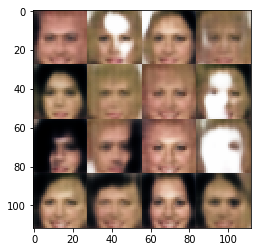

Epoch 1/1... Discriminator Loss: 0.4050... Generator Loss: 3.5230


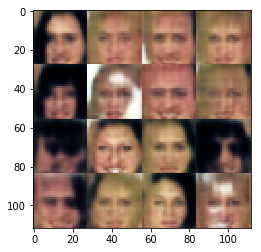

Epoch 1/1... Discriminator Loss: 0.3917... Generator Loss: 3.0258


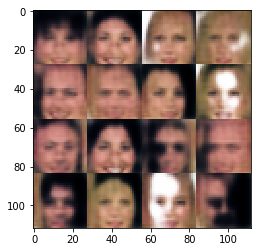

Epoch 1/1... Discriminator Loss: 0.5206... Generator Loss: 3.0535


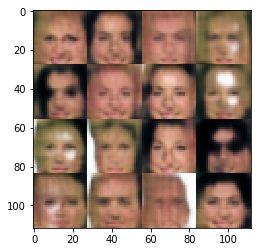

Epoch 1/1... Discriminator Loss: 0.3972... Generator Loss: 2.8841


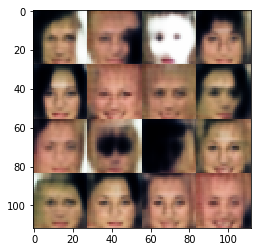

Epoch 1/1... Discriminator Loss: 0.4193... Generator Loss: 2.5440


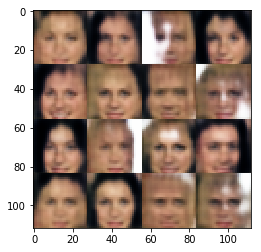

Epoch 1/1... Discriminator Loss: 0.3910... Generator Loss: 3.7870


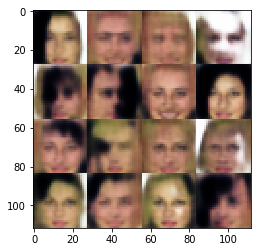

Epoch 1/1... Discriminator Loss: 0.3978... Generator Loss: 4.1608


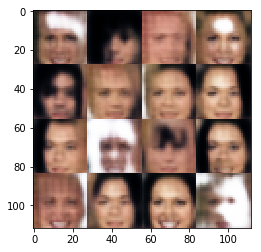

Epoch 1/1... Discriminator Loss: 0.4775... Generator Loss: 2.6334


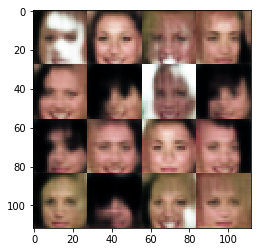

Epoch 1/1... Discriminator Loss: 0.3771... Generator Loss: 3.2786


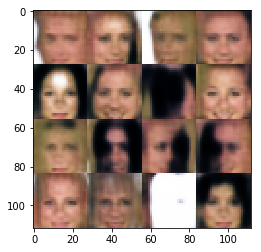

Epoch 1/1... Discriminator Loss: 0.3715... Generator Loss: 3.4718


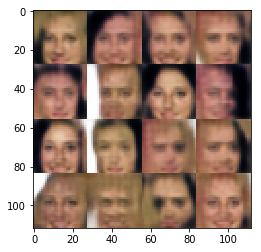

Epoch 1/1... Discriminator Loss: 0.3580... Generator Loss: 4.0282


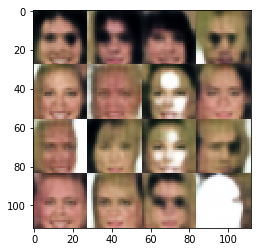

Epoch 1/1... Discriminator Loss: 0.4078... Generator Loss: 3.7618


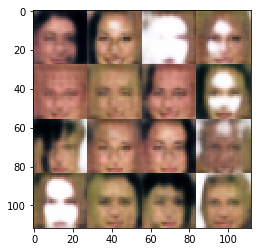

Epoch 1/1... Discriminator Loss: 0.3464... Generator Loss: 3.9024


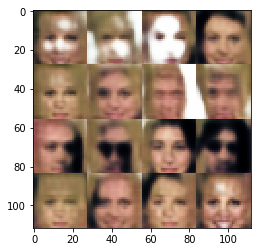

Epoch 1/1... Discriminator Loss: 0.3690... Generator Loss: 3.4664


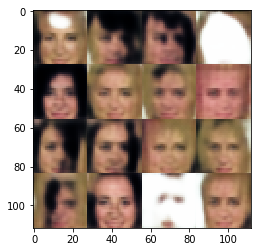

Epoch 1/1... Discriminator Loss: 0.3721... Generator Loss: 3.2884


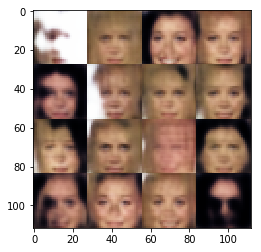

Epoch 1/1... Discriminator Loss: 0.3977... Generator Loss: 3.3379


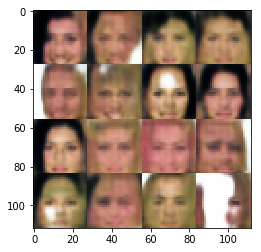

Epoch 1/1... Discriminator Loss: 0.3822... Generator Loss: 3.3985


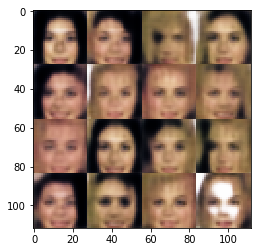

Epoch 1/1... Discriminator Loss: 0.3713... Generator Loss: 2.8247


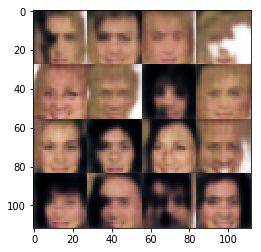

Epoch 1/1... Discriminator Loss: 0.4130... Generator Loss: 2.4340


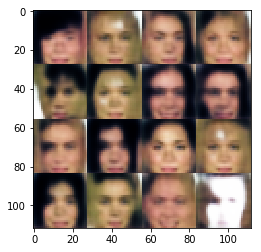

Epoch 1/1... Discriminator Loss: 0.5871... Generator Loss: 3.4815


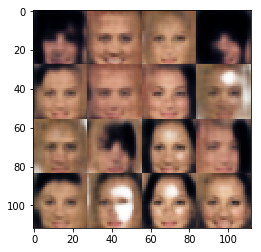

Epoch 1/1... Discriminator Loss: 0.4024... Generator Loss: 3.8906


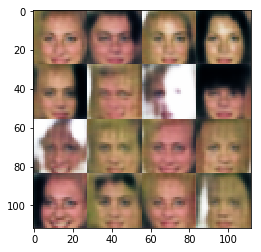

Epoch 1/1... Discriminator Loss: 0.3572... Generator Loss: 4.0181


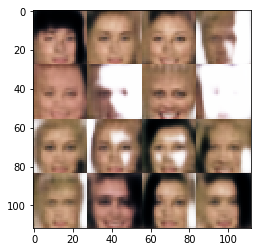

Epoch 1/1... Discriminator Loss: 0.4294... Generator Loss: 2.8168


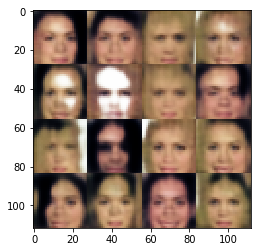

Epoch 1/1... Discriminator Loss: 0.3807... Generator Loss: 3.0924


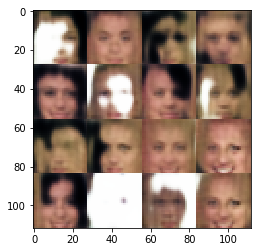

Epoch 1/1... Discriminator Loss: 0.4144... Generator Loss: 2.8783


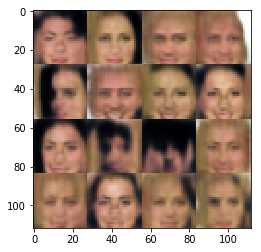

Epoch 1/1... Discriminator Loss: 0.3795... Generator Loss: 3.1651


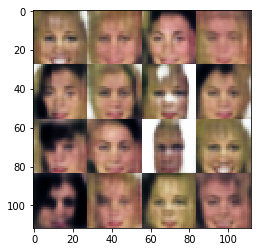

Epoch 1/1... Discriminator Loss: 0.3927... Generator Loss: 3.2202


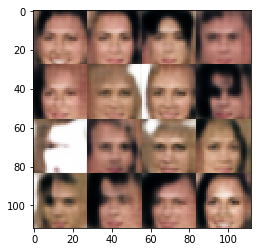

Epoch 1/1... Discriminator Loss: 0.3918... Generator Loss: 3.9187


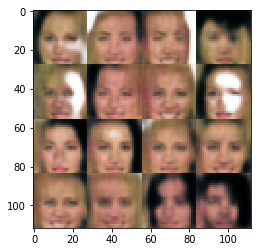

Epoch 1/1... Discriminator Loss: 0.3806... Generator Loss: 3.4664


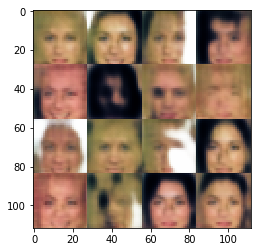

Epoch 1/1... Discriminator Loss: 0.3864... Generator Loss: 3.0241


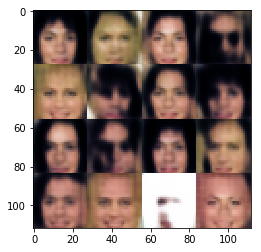

Epoch 1/1... Discriminator Loss: 0.3922... Generator Loss: 3.9526


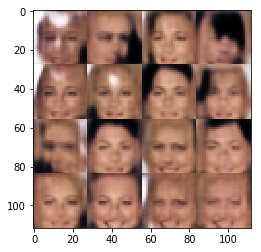

Epoch 1/1... Discriminator Loss: 0.3570... Generator Loss: 3.7996


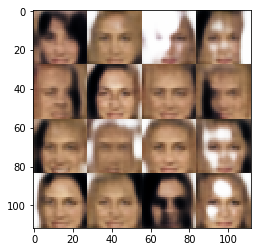

Epoch 1/1... Discriminator Loss: 0.3581... Generator Loss: 3.5795


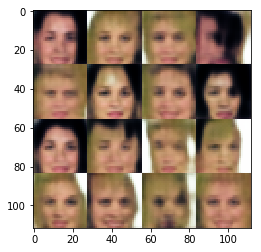

Epoch 1/1... Discriminator Loss: 0.3560... Generator Loss: 3.6878


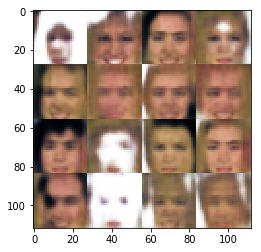

Epoch 1/1... Discriminator Loss: 0.3848... Generator Loss: 2.8690


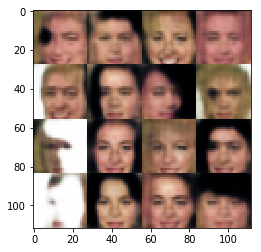

Epoch 1/1... Discriminator Loss: 0.3608... Generator Loss: 3.7854


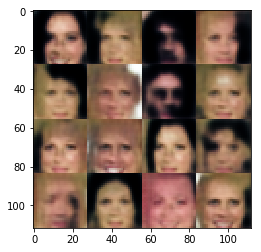

Epoch 1/1... Discriminator Loss: 0.3631... Generator Loss: 4.0298


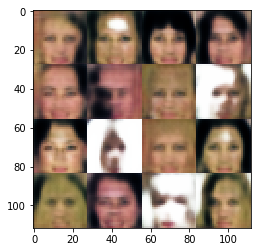

In [15]:
batch_size = 16
z_dim = 100
learning_rate = 0.00025
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.